In [1]:
# Importing numpy and functions
import numpy as np
import helpers as h
from implementations import *
import matplotlib.pyplot as plt

In [2]:
# Setting a random seed
seed = 934586
np.random.seed(seed)

#### Setting some hyperparameters ########
K = 5                          # The number of folds for cross validation
gamma = 0.3                    # The step size for the numerical regressions
max_iter = 100                  # The maximum number of iterations for the numerical regressions
featureThreshold = 0.7          # The percent of each feature that must be valid for the feature not to be discarded
acceptableMissingValues = 5    # The number of invalid values a sample may have without being discarded
outlierThreshold = 30           # The number of standard deviations away from the mean an entry can be before we drop the sample

# Making a filename to save the predictions for these parameters to
savefile = f'./Predictions/regularizedLogistic_seed_{seed}_gamma_{gamma}_iter_{max_iter}_K_{K}_featShold_{featureThreshold}_missVals_{acceptableMissingValues}.csv'

In [3]:
# Loading the data
X, xHeader, Y, yHeader, indexedX, indexedXheader, indexedY, indexedYheader = loadTrainingData()

Data successfully loaded, there are 321 features and 328135 samples, the shapes of the unindexed data is:
y: (328135, 1), x: (328135, 321)


In [4]:
# Cleaning/feature engineering the data
yClean, xClean, xHeaderClean, removedFeatures = dataCleaning(Y,X,xHeader,featureThreshold,acceptableMissingValues,outlierThreshold)
print('')
# Making a balanced data set to force the model to not just predict negatively all the time
yBalanced, xBalanced = balanceData(yClean,xClean)
print('')
# Adding dummy variables and replacing the remaining invalid values by the mean
tx = makeTrainingData(xBalanced)
print(f'The resultant dataarray tx has shape {tx.shape}')

For a threshold of 0.7, there are 144 good features, and 177 bad features
There remains in the data 289870 samples with at most 5 missing values
The number of invalid entries remaing in the dataset is 272938
That is 0.006538802834987332 parts of the whole dataset
Removed 125 samples with outliers more than 30 standard deviations from the mean. There remains 289745 samples in the dataset.
Standardized data by subtracting the mean and dividing by the standard deviation

Created a balanced subset of the data, with 51966 samples, 25983 of positive and 25983 negative samples

Added dummy variable and replaced invalid entries with zeros
The resultant dataarray tx has shape (51966, 145)


0.0001


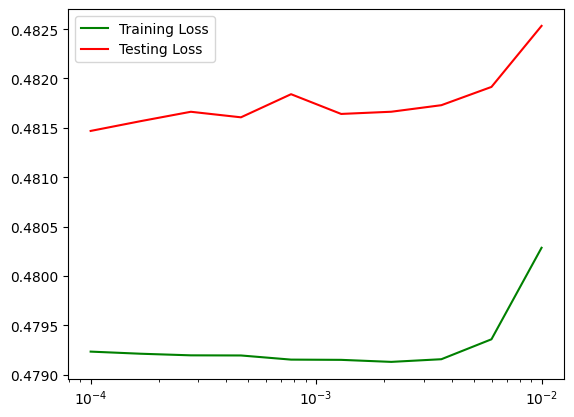

In [5]:
# Initializing the weights at zero
initial_w = np.zeros(tx.shape[1])

# Setting some lambdas to check for the best among them
lambdas = np.logspace(-4,-2,10)
# Looking for the best of the chosen lambdas
train_loss, test_loss, bestLambda, best_w = determineLambda(yBalanced,tx,initial_w,lambdas,max_iter,K,gamma)
print(bestLambda)

# Plotting the training and testing errors as functions of lambda
plt.plot(lambdas,train_loss,label='Training Loss', color='g')
plt.plot(lambdas,test_loss,label='Testing Loss', color='r')
plt.xscale('log')
plt.legend()
plt.show()

In [6]:
predictions_best_w = makePredictions(best_w,X,xHeader,xHeaderClean)
f1_best_w = f1_score(Y,predictions_best_w)
print(f1_best_w)

Added dummy variable and replaced invalid entries with zeros
0.35782532014416074


In [7]:
############## Making predictions ###############
# Loading the test data
xTest, xIndexedHeader = loadData('./Data/x_test.csv')

# Making predictions
pred_best_w = makePredictions(best_w,xTest[:,1:],xHeader,xHeaderClean)
# Counting predicted positive cases
print(f'The model had a f1 score of {f1_best_w}, and predicts {np.sum(pred_best_w)} positive cases')

# Converting the predictions from 0/1 to -1/1, and making a prediction file ready for submission
pred_best_w[pred_best_w == 0] = -1

h.create_csv_submission(xTest[:,0], pred_best_w, savefile)
print(f'The predictions were succesfully saved to {savefile}')

Added dummy variable and replaced invalid entries with zeros
The model had a f1 score of 0.35782532014416074, and predicts 33925.0 positive cases
The predictions were succesfully saved to ./Predictions/regularizedLogistic_seed_934586_gamma_0.3_iter_100_K_5_featShold_0.7_missVals_5.csv
